In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Ligue_1 python.ipynb',
 'Shooting analysis Ligue 1 2022-2023.ipynb',
 'Shooting.csv']

In [15]:
ligue_1 = pd.read_csv('Shooting.csv', delimiter=";" )
ligue_1.head(5)

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches
0,1,Kylian Mbappé,fr FRA,FW,Paris S-G,23,1998,34,32,"2,818",...,0.16,1.09,0.83,0.99,0.84,0.23,1.07,0.71,0.94,Matches
1,2,Alexandre Lacazette,fr FRA,FW,Lyon,31,1991,35,34,"2,929",...,0.15,0.98,0.65,0.80,0.74,0.16,0.91,0.55,0.71,Matches
2,3,Jonathan David,ca CAN,FW,Lille,22,2000,37,36,"3,166",...,0.11,0.80,0.40,0.51,0.67,0.17,0.84,0.43,0.60,Matches
3,4,Folarin Balogun,us USA,FW,Reims,21,2001,37,34,"2,999",...,0.06,0.69,0.45,0.51,0.80,0.11,0.91,0.63,0.74,Matches
4,5,Loïs Openda,be BEL,FW,Lens,22,2000,38,29,"2,517",...,0.14,0.89,0.72,0.86,0.66,0.15,0.81,0.63,0.78,Matches


# Data Exploration

In [5]:
ligue_1.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Matches'],
      dtype='object')

In [6]:
ligue_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          606 non-null    int64  
 1   Player      606 non-null    object 
 2   Nation      606 non-null    object 
 3   Pos         606 non-null    object 
 4   Squad       606 non-null    object 
 5   Age         606 non-null    int64  
 6   Born        606 non-null    int64  
 7   MP          606 non-null    int64  
 8   Starts      606 non-null    int64  
 9   Min         606 non-null    object 
 10  90s         606 non-null    float64
 11  Gls         606 non-null    int64  
 12  Ast         606 non-null    int64  
 13  G+A         606 non-null    int64  
 14  G-PK        606 non-null    int64  
 15  PK          606 non-null    int64  
 16  PKatt       606 non-null    int64  
 17  CrdY        606 non-null    int64  
 18  CrdR        606 non-null    int64  
 19  xG          605 non-null    f

In [229]:
ligue_df.describe()

,Age,MP,Starts,Gls,Ast,PK,GoalsPerMatch,Gls_and_Ast
count,606.00000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,24.50165,19.054455,13.795380,1.698020,1.120462,0.188119,0.069098,2.818482
std,4.75438,12.105269,11.754558,3.477849,1.867604,0.829771,0.127319,4.740547
min,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.00000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.00000,19.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,28.00000,31.000000,24.000000,2.000000,2.000000,0.000000,0.089921,3.000000
max,38.00000,38.000000,38.000000,29.000000,16.000000,10.000000,1.000000,34.000000


# Data Cleanning

In [12]:
Selected_columns= ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'PK']
ligue_df = ligue_1[Selected_columns]
split_values = ligue_df.Nation.str[-3:]
split_values

0      FRA
1      FRA
2      CAN
3      USA
4      BEL
      ... 
601    FRA
602    FRA
603    DEN
604    BEL
605    FRA
Name: Nation, Length: 606, dtype: object

In [13]:
ligue_df['Nation']=split_values

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_4816\1536729011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue_df['Nation']=split_values


# Creating additional columns

In [16]:
ligue_df['GoalsPerMatch'] = (ligue_df['Gls'] / ligue_df.MP).astype(float)
ligue_df['Gls_and_Ast'] = ligue_df.Gls + ligue_df.Ast
ligue_df

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_4816\1709862600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue_df['GoalsPerMatch'] = (ligue_df['Gls'] / ligue_df.MP).astype(float)
C:\Users\Interventoria\AppData\Local\Temp\ipykernel_4816\1709862600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligue_df['Gls_and_Ast'] = ligue_df.Gls + ligue_df.Ast


,Player,Nation,Pos,Squad,Age,MP,Starts,Min,Gls,Ast,PK,GoalsPerMatch,Gls_and_Ast
0,Kylian Mbappé,FRA,FW,Paris S-G,23,34,32,"2,818",29,5,3,0.852941,34
1,Alexandre Lacazette,FRA,FW,Lyon,31,35,34,"2,929",27,5,6,0.771429,32
2,Jonathan David,CAN,FW,Lille,22,37,36,"3,166",24,4,10,0.648649,28
3,Folarin Balogun,USA,FW,Reims,21,37,34,"2,999",21,2,6,0.567568,23
4,Loïs Openda,BEL,FW,Lens,22,38,29,"2,517",21,4,1,0.552632,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Rémy Riou,FRA,GK,Lyon,34,7,6,601,0,0,0,0.000000,0
602,Brice Samba,FRA,GK,Lens,28,37,37,"3,330",0,0,0,0.000000,0
603,Kasper Schmeichel,DEN,GK,Nice,35,36,36,"3,240",0,0,0,0.000000,0
604,Matz Sels,BEL,GK,Strasbourg,30,38,38,"3,420",0,0,0,0.000000,0


# Analysis

In [17]:
# Total goals scored
ligue_df.Gls.sum()

1029

In [18]:
# Total Penalties
ligue_df.PK.sum()

114

In [96]:
pk_by_team= ligue_df.groupby('Squad')[['PK','Gls']].sum()
pk_by_team_df=pd.DataFrame(pk_by_team)
pk_by_team_df=pk_by_team_df.rename(columns={'PK':'penalties'})
pk_by_team_df = pk_by_team_df.reset_index()
pk_by_team_df=pk_by_team_df.sort_values(by='Gls',ascending=False)

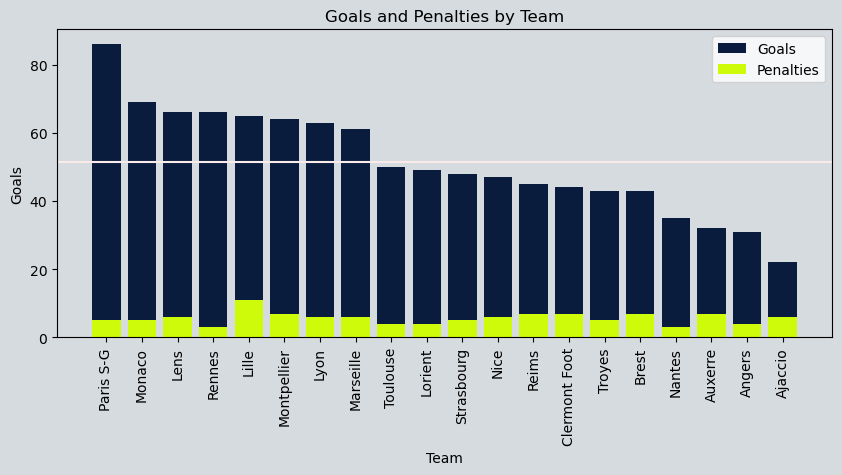

In [62]:
x=pk_by_team_df.Squad
y=pk_by_team_df.Gls
x2 = pk_by_team_df.penalties
promy=pk_by_team_df.Gls.mean()

fig,ax=plt.subplots(figsize=(10,4))

ax.axhline(promy, color='#F9EBEA')

ax.bar(x, y, label='Goals', color='#091C3E')
ax.bar(x, x2, label='Penalties',color='#CDFB0A')

ax.set_xlabel('Team')
ax.set_ylabel('Goals')
ax.set_title('Goals and Penalties by Team')
ax.legend()

ax.set_facecolor("#D6DBDF") #inbox color
fig.set_facecolor('#D6DBDF')#outbox color

plt.xticks(rotation=90);

In [236]:
top_scorers= ligue_df.sort_values('Player')
top_scorers=top_scorers[ligue_df['Gls'] >=13]
top_scorers['Min'] = top_scorers['Min'].str.replace(',','')
top_scorers['Min'] = pd.to_numeric(top_scorers['Min'])
top_scorers[['Player','Nation','Squad','Age','Min','Gls','Ast']]

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_4816\2188584774.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_scorers=top_scorers[ligue_df['Gls'] >=13]


,Player,Nation,Squad,Age,Min,Gls,Ast
1,Alexandre Lacazette,FRA,Lyon,31,2929,27,5
10,Alexis Sánchez,CHI,Marseille,33,2679,14,3
9,Amine Gouiri,FRA,Rennes,22,2523,15,3
7,Elye Wahi,FRA,Montpellier,19,2513,19,5
3,Folarin Balogun,USA,Reims,21,2999,21,2
11,Gaëtan Laborde,FRA,Nice,28,2506,13,3
5,Habib Diallo,SEN,Strasbourg,27,2879,20,1
2,Jonathan David,CAN,Lille,22,3166,24,4
0,Kylian Mbappé,FRA,Paris S-G,23,2818,29,5
8,Lionel Messi,ARG,Paris S-G,35,2837,16,16


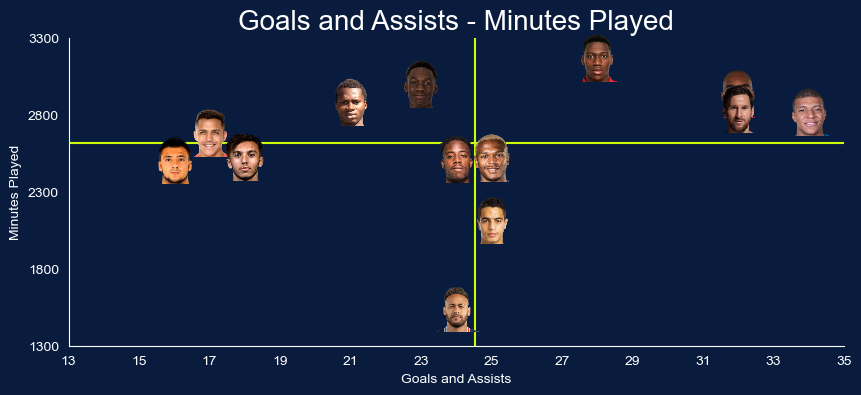

In [235]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox # to import imagessns.set_style('white')
x =top_scorers['Gls_and_Ast']
y=top_scorers.Min

promx=top_scorers['Gls_and_Ast'].mean()
promy=top_scorers.Min.mean()

fig, ax = plt.subplots(figsize =(10,4))

ax.scatter(x,y) # pasamos puntos

plt.yticks(range(min(top_scorers['Min'])-245, int(max(top_scorers['Min'])) + 550, 500), color='white')
plt.xticks(range(min(top_scorers['Gls_and_Ast'])-3, max(top_scorers['Gls_and_Ast'])+3, 2),color='white')
#set lines margin
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.set_facecolor("#091C3E") #inbox color
fig.set_facecolor('#091C3E')#outbox color

#definimos labels
nombreejex='Goals and Assists'
nombreejey='Minutes Played'
plt.xlabel(nombreejex,color='white')
plt.ylabel(nombreejey, color='white')

#definimos lineas de media
ax.axhline(promy,color='#CDFB0A')
ax.axvline(promx,color='#CDFB0A')

#titulo
plt.title(f'{nombreejex} - {nombreejey}', fontsize =20, color='white')

# set images

def getimage(path, zoom=0.17):
    return OffsetImage(plt.imread(path), zoom=zoom)
import os
files = os.listdir('C:/Users/Interventoria/Desktop/Daniel cursos/Data_Analyst/Python/Ligue 1/faces')

for x0, y0,file in zip(x,y,files):
    ab=AnnotationBbox(getimage(f'C:/Users/Interventoria/Desktop/Daniel cursos/Data_Analyst/Python/Ligue 1/faces/{file}'),
                     (x0,y0), frameon=False)
    ax.add_artist(ab)

In [144]:
countries = ligue_df['Nation'].value_counts().reset_index()
countries.columns = ['Nation', 'Count']
countries_not_france=countries[countries['Nation']!='FRA']
countries_not_france=countries_not_france.head(15)

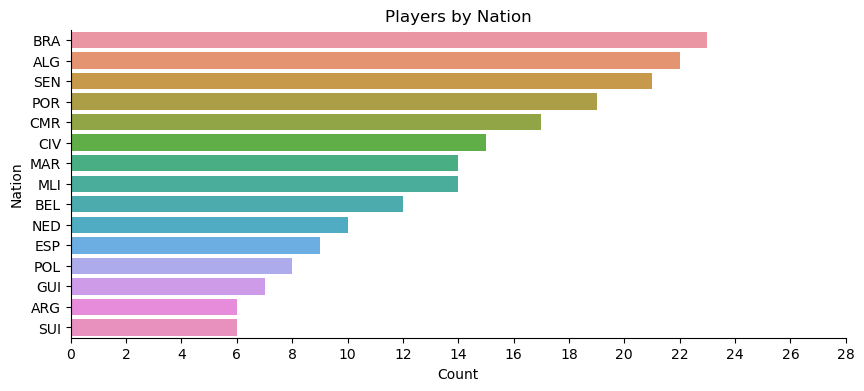

In [145]:
x=countries_not_france.Count
y=countries_not_france.Nation

fig,ax=plt.subplots(figsize=(10,4))

sns.barplot(x=x,y=y,)
plt.title('Players by Nation')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(range(0,30,2));

In [147]:
#players by age group
under_20 = ligue_df[ligue_df.Age <=20]
under_25 =ligue_df[(ligue_df.Age > 20) & (ligue_df.Age <=25)]
under_30 = ligue_df[(ligue_df.Age >25) & (ligue_df.Age <=30)]
over_30 = ligue_df[ligue_df.Age>30]

under_20=under_20.Player.count().astype(int)
under_25=under_25.Player.count().astype(int)
under_30=under_30.Player.count().astype(int)
over_30=over_30.Player.count().astype(int)

#create data frame
data = {'Range': ['Under 20', '20-25', '26-30', 'Over 30'],
        'No. players': [under_20, under_25, under_30, over_30]}

# Create the DataFrame
range_age = pd.DataFrame(data)
range_age

,Range,No. players
0,Under 20,137
1,20-25,233
2,26-30,166
3,Over 30,70


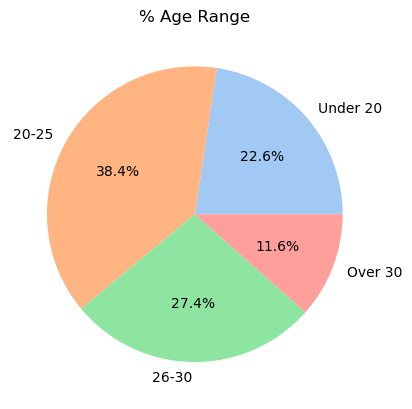

In [148]:
plt.pie(x=range_age['No. players'], labels=range_age.Range, autopct="%.1f%%",colors=sns.color_palette('pastel'))
plt.title('% Age Range');

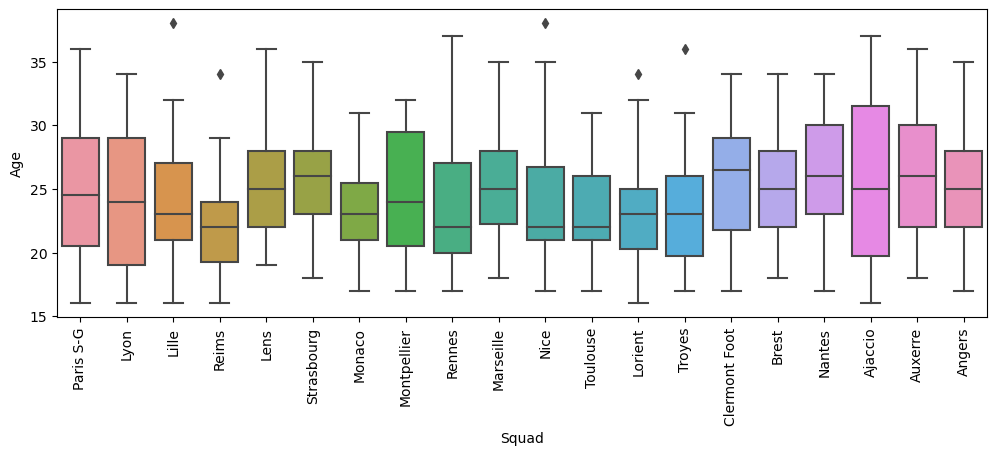

In [149]:
# Average age players in each club

plt.figure(figsize=(12,4))
sns.boxplot(x='Squad', y = 'Age', data= ligue_df)
plt.xticks(rotation=90);

In [237]:
## under 23 with most minutes on the season

under_23=ligue_df[ligue_df.Age<=23]
under_23['Min'] = under_23['Min'].str.replace(',', '')
under_23.Min=under_23.Min.astype(int)

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_4816\1962321592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_23['Min'] = under_23['Min'].str.replace(',', '')
C:\Users\Interventoria\AppData\Local\Temp\ipykernel_4816\1962321592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_23.Min=under_23.Min.astype(int)


In [219]:
under_23=under_23.sort_values(by='Min', ascending=False).head(20)
under_23['player-club'] = under_23['Player'] + ' - ' + under_23['Pos'] +'-'+ under_23['Squad'].str[:3]
under_23[['Player','Nation','Pos','Age','Min']].head(5)

,Player,Nation,Pos,Age,Min
579,Gianluigi Donnarumma,ITA,GK,23,3409
584,Alban Lafont,FRA,GK,23,3329
170,Anthony Rouault,FRA,DF,21,3314
246,Kevin Danso,AUT,DF,23,3232
2,Jonathan David,CAN,FW,22,3166


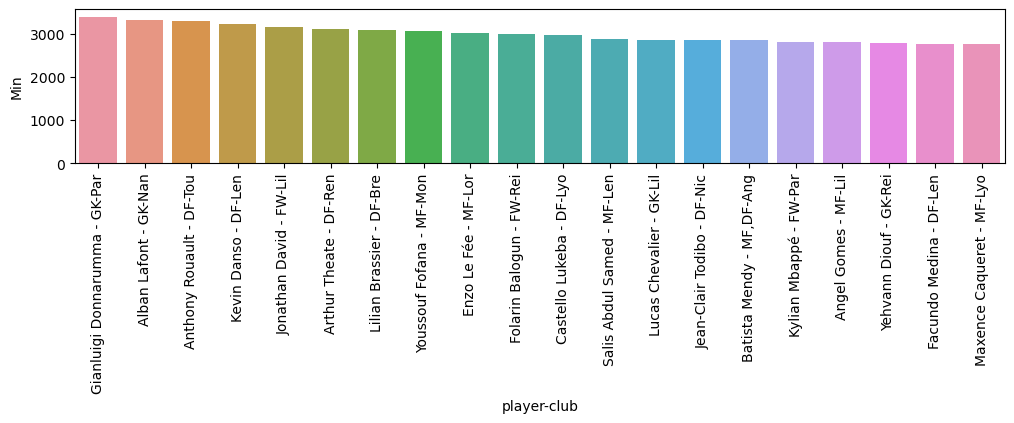

In [213]:
x=under_23['player-club']
y=under_23.Min

fig,ax=plt.subplots(figsize=(12,2))

sns.barplot(x=x,y=y)
plt.xticks(rotation=90);